## dermatology


In [ ]:
       Class code:   Class:                  Number of instances:
       1             psoriasis			    112
       2             seboreic dermatitis             61
       3             lichen planus                   72
       4             pityriasis rosea                49
       5             cronic dermatitis               52    
       6             pityriasis rubra pilaris        20

In [135]:
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import time

def run_k_means(X, n_clusters=20):  
    k_means = KMeans(n_clusters=n_clusters, n_jobs=8)
    k_means.fit(X)
    return k_means.labels_, k_means

def run_k_means_ar(ar, n_clusters=20):
    out = []
    for x in ar:
        start = time.time()
        clusters, kmeans = run_k_means(x, n_clusters=n_clusters )
        e = {'prediction': clusters ,
             'model': kmeans,
             'time': time.time() - start}
        print(e)
        out.append( e )
    return out
    
    
def run_maxlikelyhood_ar(ar, n_clusters=20):
    out = []
    for x in ar:
        start = time.time()
        prediction, model = maxlikelyhood_transform(x, n_components=n_clusters )
        e = {'prediction': prediction ,
             'model' : model,
             'time': time.time() - start}
        print(e)
        out.append( e )
    return out
    

def maxlikelyhood_transform(X, n_components=20 ):
    max_likelyhood = GMM(n_components=n_components)
    max_likelyhood.fit(X)
    return max_likelyhood.predict(X), max_likelyhood

def enrich_with_cluster(datasets, clusters):
    out = []
    lb = LabelBinarizer()
    for i, dataset in enumerate(datasets):
        cluster = clusters[i]
        print('dataset')
        print(dataset)
        print(dataset.shape)
        
        print('cluster')
        print(cluster)
        print(cluster.shape)
        cluster_bin = lb.fit_transform(cluster)
        print('cluster-bin')
        print(cluster_bin)
        print(cluster_bin.shape)
        e = np.hstack((dataset, cluster_bin))
        print('output')
        print(e)
        print(e.shape)
        out.append(e)
    return out

def get_predictions(kmeans_ar):
    return [ kmean['prediction'] for kmean in kmeans_ar]


from sknn.mlp import Classifier, Layer  
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import StratifiedKFold, cross_val_score
import time
%matplotlib inline  


def run_nn_cv(X, y,n_iter=1, units=300, cv=3):
    start = time.time()
#     print X.shape[1]
    features = X.shape[1]
    pipeline = Pipeline([
            ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
            ('neural network', Classifier(layers=[Layer("Rectifier", units=units),
                                                  Layer("Rectifier", units=units),
                                                  Layer('Softmax')],
                                         n_iter=n_iter))
            
        ])
    cv = cross_val_score(pipeline, X, y,cv=cv , n_jobs=-1)
    out = {'cv': cv, 'time': time.time()- start}
    print(out)
    return out

In [136]:
import sklearn
import urllib
import numpy as np

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data"

raw_data = urllib.urlopen(data_url)

raw_data?


dataset = np.genfromtxt(raw_data, delimiter=",")


In [16]:
dataset

array([[  2.,   2.,   0., ...,   0.,  55.,   2.],
       [  3.,   3.,   3., ...,   0.,   8.,   1.],
       [  2.,   1.,   2., ...,   3.,  26.,   3.],
       ..., 
       [  3.,   2.,   2., ...,   3.,  28.,   3.],
       [  2.,   1.,   3., ...,   3.,  50.,   3.],
       [  3.,   2.,   2., ...,   0.,  35.,   1.]])

In [17]:
dataset.shape


(366, 35)

In [18]:
dataset[37]

array([  2.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   1.,   0.,   3.,   2.,   1.,   0.,   0.,   0.,   0.,
         2.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,
        15.,   2.])

In [19]:
from sklearn.preprocessing import Imputer


dataset_missing_fixed = Imputer().fit_transform(dataset)

In [20]:
raw_x = dataset_missing_fixed [:,0:-1]
raw_y = dataset_missing_fixed [:,-1]

In [21]:
raw_x

array([[  2.,   2.,   0., ...,   1.,   0.,  55.],
       [  3.,   3.,   3., ...,   1.,   0.,   8.],
       [  2.,   1.,   2., ...,   2.,   3.,  26.],
       ..., 
       [  3.,   2.,   2., ...,   2.,   3.,  28.],
       [  2.,   1.,   3., ...,   2.,   3.,  50.],
       [  3.,   2.,   2., ...,   3.,   0.,  35.]])

In [22]:
all_class = raw_y.astype(int)
all_class

array([2, 1, 3, 1, 3, 2, 5, 3, 4, 4, 1, 2, 2, 1, 3, 4, 2, 1, 3, 5, 6, 2, 5,
       3, 5, 1, 6, 5, 2, 3, 1, 2, 1, 1, 4, 2, 3, 2, 3, 1, 2, 4, 1, 2, 5, 3,
       4, 6, 2, 3, 3, 4, 1, 1, 5, 1, 2, 3, 4, 2, 6, 1, 5, 1, 2, 3, 1, 4, 5,
       1, 2, 6, 3, 5, 4, 2, 2, 1, 3, 5, 1, 2, 2, 2, 5, 1, 1, 3, 1, 4, 2, 2,
       5, 1, 3, 4, 2, 5, 1, 6, 2, 5, 1, 2, 2, 1, 4, 1, 3, 1, 1, 3, 5, 3, 3,
       5, 2, 3, 4, 1, 2, 5, 6, 1, 1, 2, 6, 3, 5, 4, 1, 1, 3, 5, 5, 1, 4, 2,
       3, 1, 2, 1, 1, 3, 3, 3, 2, 5, 4, 2, 2, 1, 1, 1, 5, 3, 2, 3, 2, 2, 4,
       2, 3, 6, 2, 1, 1, 3, 4, 3, 3, 1, 1, 1, 3, 1, 1, 2, 3, 3, 1, 1, 1, 1,
       6, 2, 2, 2, 2, 1, 3, 3, 3, 1, 1, 2, 3, 2, 2, 2, 5, 5, 5, 5, 5, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 4, 4, 4, 1, 1, 1, 1,
       1, 2, 2, 4, 4, 4, 1, 1, 2, 2, 2, 3, 3, 3, 3, 1, 1, 1, 1, 5, 5, 5, 5,
       5, 3,

In [23]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

all_inputs = min_max_scaler.fit_transform(raw_x)
all_inputs

array([[ 0.66666667,  0.66666667,  0.        , ...,  0.33333333,
         0.        ,  0.73333333],
       [ 1.        ,  1.        ,  1.        , ...,  0.33333333,
         0.        ,  0.10666667],
       [ 0.66666667,  0.33333333,  0.66666667, ...,  0.66666667,
         1.        ,  0.34666667],
       ..., 
       [ 1.        ,  0.66666667,  0.66666667, ...,  0.66666667,
         1.        ,  0.37333333],
       [ 0.66666667,  0.33333333,  1.        , ...,  0.66666667,
         1.        ,  0.66666667],
       [ 1.        ,  0.66666667,  0.66666667, ...,  1.        ,
         0.        ,  0.46666667]])

In [24]:
from sklearn.cross_validation import train_test_split

(train_X,
test_X,
train_Y,
test_Y ) = train_test_split(all_inputs, all_class)


## KMeans

In [25]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=10, n_jobs=16)

%time k_means.fit(train_X)
raw_k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(raw_k_means_labels)


CPU times: user 0 ns, sys: 252 ms, total: 252 ms
Wall time: 807 ms


In [26]:
print raw_k_means_labels
print k_means_labels_unique

[2 6 8 2 9 3 5 7 6 4 2 8 3 2 3 7 0 5 0 9 1 3 2 9 6 4 3 3 3 6 3 9 6 9 6 9 6
 2 1 5 8 2 5 3 2 3 4 7 7 8 2 9 2 1 9 6 1 3 3 7 1 3 6 3 9 1 8 2 3 6 3 7 0 2
 5 3 1 1 1 1 3 0 1 2 6 5 1 8 0 1 2 9 4 1 3 6 7 9 2 9 9 5 7 2 5 1 9 4 8 0 1
 9 3 9 3 7 0 6 8 3 9 9 8 1 3 5 1 5 9 0 2 2 9 8 9 8 3 9 5 3 2 9 7 3 8 0 9 1
 6 5 2 2 9 3 1 4 2 9 8 5 0 4 5 0 7 9 2 2 3 4 9 6 9 7 9 2 9 2 3 7 3 3 5 6 3
 0 6 2 1 4 2 3 4 5 1 0 1 5 9 2 5 3 9 3 6 9 1 4 2 6 2 2 9 2 5 1 6 8 9 5 5 0
 1 2 2 9 2 1 2 1 1 9 6 9 3 5 5 1 9 5 1 8 5 3 9 9 5 2 6 9 5 0 9 3 1 2 7 8 4
 1 7 1 8 1 6 0 8 9 2 7 0 9 1 5]
[0 1 2 3 4 5 6 7 8 9]


### Maximum likelyhood


In [27]:
from sklearn.mixture import GMM

max_likelyhood = GMM(n_components=10)

%time max_likelyhood.fit(train_X)


CPU times: user 40 ms, sys: 220 ms, total: 260 ms
Wall time: 66.8 ms


GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=10, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

In [28]:
maxlikelyhood_train_X = max_likelyhood.predict(train_X)
maxlikelyhood_train_X

array([1, 9, 2, 1, 6, 4, 0, 7, 9, 5, 1, 2, 4, 1, 4, 7, 3, 5, 3, 6, 8, 4, 1,
       6, 9, 5, 4, 4, 4, 9, 4, 6, 9, 6, 9, 6, 9, 1, 8, 5, 2, 1, 0, 4, 1, 4,
       5, 7, 7, 2, 1, 6, 1, 2, 6, 9, 8, 4, 4, 7, 8, 4, 9, 4, 6, 2, 2, 1, 4,
       9, 4, 7, 3, 1, 5, 4, 8, 8, 8, 8, 4, 0, 8, 1, 9, 5, 8, 2, 3, 8, 1, 6,
       5, 8, 4, 9, 7, 6, 1, 6, 6, 5, 7, 1, 5, 8, 6, 5, 2, 3, 8, 6, 4, 6, 4,
       7, 3, 9, 2, 4, 6, 6, 2, 8, 4, 5, 8, 0, 6, 3, 1, 1, 6, 2, 6, 2, 4, 6,
       5, 4, 1, 6, 7, 6, 2, 3, 6, 8, 9, 5, 1, 1, 6, 4, 8, 5, 1, 6, 2, 0, 3,
       5, 5, 3, 7, 6, 1, 1, 4, 5, 6, 9, 6, 7, 6, 1, 6, 1, 4, 7, 6, 4, 0, 9,
       4, 5, 9, 1, 8, 5, 1, 4, 5, 5, 8, 0, 8, 5, 6, 1, 0, 4, 6, 4, 9, 4, 8,
       5, 1, 9, 1, 1, 6, 1, 5, 8, 9, 2, 6, 5, 5, 3, 8, 1, 1, 6, 1, 8, 1, 8,
       8, 6, 9, 6, 6, 5, 0, 8, 6, 5, 8, 2, 5, 4, 6, 6, 5, 1, 9, 4, 5, 3, 4,
       4, 8, 1, 7, 2, 5, 8, 7, 8, 2, 8, 9, 3, 2, 6, 1, 7, 3, 6, 8, 5])

## PCA

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

pca.fit(train_X)
print(pca.explained_variance_ratio_)

[ 0.32111509  0.17782562  0.07459792  0.05003953  0.04208249  0.0342017
  0.03047999  0.02622912  0.02330899  0.02240744]


In [30]:
pca.score_samples(train_X)

array([  4.2924095 ,  -0.81764904,  10.16261121,   9.1639561 ,
        14.33657038,  -4.60032773,  -1.09705958,  -4.58204982,
         5.7318787 ,  -1.15353902,   9.94168738,  12.48028913,
        -2.8184472 ,  11.81522255,   2.80633448,   6.09155671,
        10.3944056 ,   5.57515948,   3.56024038,   9.12497264,
        11.53243275,  14.4911355 ,   8.83305195,   8.48954767,
         7.78376004,   6.72548951,  11.42769522,   9.66112736,
        18.37626726,  11.91438093,  12.57070839,  15.68067558,
         3.75749927,  17.49599828, -24.19960202,  -0.81391839,
         7.07028581,  13.38144362,  11.83364953,  -4.97337179,
         1.39423639,   6.52669946,   3.28905658,   5.02239571,
         3.29431731,  13.87879275, -12.40889447,  -2.63240834,
         8.42116916,   1.71752248,   9.39894238,  15.71630909,
         4.99845841,   6.63140055,   7.76913684,   0.71617145,
         5.48163846,   5.68264161,  -1.81741524,  10.24392484,
         4.09561675,   5.76959635, -12.20360174,  11.02

In [31]:
train_x_pca = pca.transform(train_X)
test_x_pca = pca.transform(test_X)
train_x_pca.shape

(274, 10)

### FastICA

In [32]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=10)
%time fast_ica.fit(train_X, train_Y)
train_x_ica = fast_ica.transform(train_X)
test_x_ica = fast_ica.transform(test_X)

CPU times: user 156 ms, sys: 624 ms, total: 780 ms
Wall time: 159 ms


In [33]:
train_x_ica.shape

(274, 10)

### Random Projection

In [34]:
from sklearn.random_projection import GaussianRandomProjection

random_projection = GaussianRandomProjection(n_components=10)

%time random_projection.fit(train_X)
%time train_x_rand = random_projection.transform(train_X)
%time test_x_rand = random_projection.transform(test_X)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 555 µs
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 146 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 124 µs


### SelectKBest

In [35]:
from sklearn.feature_selection import SelectKBest
select_k_best = SelectKBest()
%time select_k_best.fit(train_X, train_Y)
%time train_x_10best = select_k_best.transform(train_X)
%time test_x_10best = select_k_best.transform(test_X)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 157 ms
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 180 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 164 µs


### Clustering

In [137]:
datasets = train_X, train_x_pca, train_x_ica, train_x_rand, train_x_10best
kmeans_ar = run_k_means_ar(datasets, n_clusters=6)
enriched_kmeans_ar = enrich_with_cluster(datasets, get_predictions(kmeans_ar) ) 

{'model': KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=8, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0), 'prediction': array([1, 2, 3, 1, 0, 0, 5, 4, 2, 2, 1, 3, 0, 1, 0, 4, 2, 5, 2, 0, 3, 0, 1,
       0, 5, 5, 0, 0, 0, 2, 0, 0, 5, 0, 2, 0, 2, 1, 3, 5, 3, 1, 5, 0, 1, 0,
       2, 4, 4, 3, 1, 0, 1, 3, 0, 5, 3, 0, 0, 4, 3, 0, 5, 0, 0, 3, 3, 1, 0,
       2, 0, 4, 2, 1, 5, 0, 3, 3, 3, 3, 0, 5, 3, 1, 2, 5, 3, 3, 2, 3, 1, 0,
       5, 3, 0, 2, 4, 0, 1, 0, 0, 5, 4, 1, 5, 3, 0, 5, 3, 2, 3, 0, 0, 0, 0,
       4, 2, 5, 3, 0, 0, 0, 3, 3, 0, 5, 3, 5, 0, 2, 1, 1, 0, 3, 0, 3, 0, 0,
       5, 0, 1, 0, 4, 0, 3, 2, 0, 3, 5, 2, 1, 1, 0, 0, 3, 2, 1, 0, 3, 5, 2,
       2, 5, 2, 4, 0, 1, 1, 0, 5, 0, 2, 0, 4, 0, 1, 0, 1, 0, 4, 0, 0, 5, 5,
       0, 2, 2, 1, 3, 5, 1, 0, 2, 2, 3, 5, 3, 2, 0, 1, 5, 0, 0, 0, 5, 0, 3,
       5, 1, 2, 1, 1, 0, 1, 5, 3, 2, 3, 0, 5, 5, 5, 3, 1, 1, 0, 1, 3, 1, 3,
       3, 0, 5, 0, 0, 5, 5, 3, 0, 5, 3, 3, 5, 0, 

In [138]:
maxlikelyhood_ar = run_maxlikelyhood_ar(datasets,n_clusters=6)
enriched_maxlikelyhood_ar = enrich_with_cluster(datasets, get_predictions(maxlikelyhood_ar) ) 

{'model': GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=6, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0), 'prediction': array([1, 5, 0, 1, 4, 4, 2, 3, 5, 2, 1, 0, 4, 1, 4, 3, 2, 2, 2, 4, 0, 4, 1,
       4, 5, 2, 4, 4, 4, 5, 4, 4, 5, 4, 5, 4, 5, 1, 0, 2, 0, 1, 2, 4, 1, 4,
       2, 3, 3, 0, 1, 4, 1, 0, 4, 5, 0, 4, 4, 3, 0, 4, 5, 4, 4, 0, 0, 1, 4,
       5, 4, 3, 2, 1, 2, 4, 0, 0, 0, 0, 4, 2, 0, 1, 5, 2, 0, 0, 2, 0, 1, 4,
       2, 0, 4, 5, 3, 4, 1, 4, 4, 2, 3, 1, 2, 0, 4, 2, 0, 2, 0, 4, 4, 4, 4,
       3, 2, 5, 0, 4, 4, 4, 0, 0, 4, 2, 0, 2, 4, 2, 1, 1, 4, 0, 4, 0, 4, 4,
       2, 4, 1, 4, 3, 4, 0, 2, 4, 0, 5, 2, 1, 1, 4, 4, 0, 2, 1, 4, 0, 2, 2,
       2, 2, 2, 3, 4, 1, 1, 4, 2, 4, 5, 4, 3, 4, 1, 4, 1, 4, 3, 4, 4, 2, 5,
       4, 2, 5, 1, 0, 2, 1, 4, 2, 2, 0, 2, 0, 2, 4, 1, 2, 4, 4, 4, 5, 4, 0,
       2, 1, 5, 1, 1, 4, 1, 2, 0, 5, 0, 4, 2, 2, 2, 0, 1, 1, 4, 1, 0, 1, 0,
       0, 4, 5, 4, 4, 2, 2, 0, 4, 2, 0, 0

In [139]:
all_data = list(datasets) + enriched_kmeans_ar + enriched_maxlikelyhood_ar

In [140]:
cv_scores = [ run_nn_cv(ds, train_Y,units=30, n_iter=30, cv=10) for ds in all_data ]

{'cv': array([ 0.96551724,  1.        ,  0.96551724,  1.        ,  0.96428571,
        0.92857143,  0.92307692,  0.92307692,  0.96      ,  0.96      ]), 'time': 7.39321494102478}
{'cv': array([ 0.96551724,  0.93103448,  0.96551724,  1.        ,  0.96428571,
        1.        ,  0.96153846,  0.96153846,  0.96      ,  1.        ]), 'time': 7.3776140213012695}
{'cv': array([ 0.93103448,  0.93103448,  0.96551724,  1.        ,  0.96428571,
        0.92857143,  0.96153846,  0.96153846,  0.96      ,  1.        ]), 'time': 8.087377071380615}
{'cv': array([ 0.79310345,  0.86206897,  0.89655172,  0.89655172,  0.85714286,
        0.78571429,  0.96153846,  0.88461538,  0.96      ,  0.96      ]), 'time': 8.567901134490967}
{'cv': array([ 0.82758621,  0.82758621,  0.86206897,  0.86206897,  0.85714286,
        0.78571429,  0.84615385,  0.84615385,  0.88      ,  0.88      ]), 'time': 7.400100946426392}
{'cv': array([ 0.96551724,  1.        ,  0.96551724,  1.        ,  0.96428571,
        1.        ,  

In [141]:
import pandas as pd
df = pd.DataFrame([ cv_score['cv'] for cv_score in cv_scores]).T
orig_cols = ['raw', 'pca', 'ica', 'rand', '10max' ]
kmeans_cols = [ col + '_kmeans' for col in orig_cols ]
maxexp_cols = [ col + '_maxexp' for col in orig_cols ]
cols = orig_cols + kmeans_cols + maxexp_cols
print(cols)
df.columns = cols
df

['raw', 'pca', 'ica', 'rand', '10max', 'raw_kmeans', 'pca_kmeans', 'ica_kmeans', 'rand_kmeans', '10max_kmeans', 'raw_maxexp', 'pca_maxexp', 'ica_maxexp', 'rand_maxexp', '10max_maxexp']


,raw,pca,ica,rand,10max,raw_kmeans,pca_kmeans,ica_kmeans,rand_kmeans,10max_kmeans,raw_maxexp,pca_maxexp,ica_maxexp,rand_maxexp,10max_maxexp
0,0.965517,0.965517,0.931034,0.793103,0.827586,0.965517,0.931034,0.896552,0.724138,0.827586,0.965517,0.896552,0.896552,0.793103,0.827586
1,1.000000,0.931034,0.931034,0.862069,0.827586,1.000000,0.931034,0.931034,0.862069,0.862069,0.965517,0.931034,0.931034,0.896552,0.827586
2,0.965517,0.965517,0.965517,0.896552,0.862069,0.965517,0.965517,0.965517,0.965517,0.862069,0.965517,0.965517,0.931034,0.931034,0.862069
3,1.000000,1.000000,1.000000,0.896552,0.862069,1.000000,1.000000,0.965517,0.862069,0.862069,1.000000,1.000000,1.000000,0.965517,0.862069
4,0.964286,0.964286,0.964286,0.857143,0.857143,0.964286,0.964286,0.928571,0.821429,0.857143,0.964286,0.892857,0.857143,0.892857,0.857143
5,0.928571,1.000000,0.928571,0.785714,0.785714,1.000000,1.000000,0.964286,0.857143,0.750000,1.000000,1.000000,0.964286,0.892857,0.821429
6,0.923077,0.961538,0.961538,0.961538,0.846154,0.923077,0.961538,0.961538,0.961538,0.807692,0.923077,0.961538,0.923077,0.884615,0.846154
7,0.923077,0.961538,0.961538,0.884615,0.846154,0.923077,0.961538,0.961538,0.884615,0.846154,0.923077,0.961538,0.961538,0.846154,0.846154
8,0.960000,0.960000,0.960000,0.960000,0.880000,0.960000,0.960000,0.960000,0.960000,0.880000,0.960000,0.960000,0.960000,0.920000,0.880000
9,0.960000,1.000000,1.000000,0.960000,0.880000,0.960000,1.000000,0.960000,0.920000,0.880000,0.960000,1.000000,0.960000,0.920000,0.880000


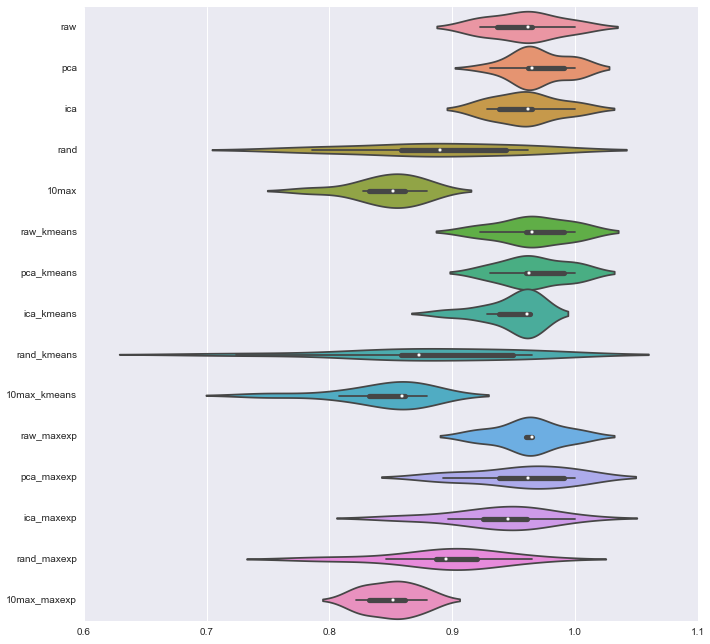

In [142]:
import seaborn as sb
import matplotlib.pyplot as plt
from pylab import savefig

fig = plt.figure(figsize=(11,11))

ax = sb.violinplot(df, orient='h',width=1.2)

fig.savefig('derm_nn.png', dpi=300)

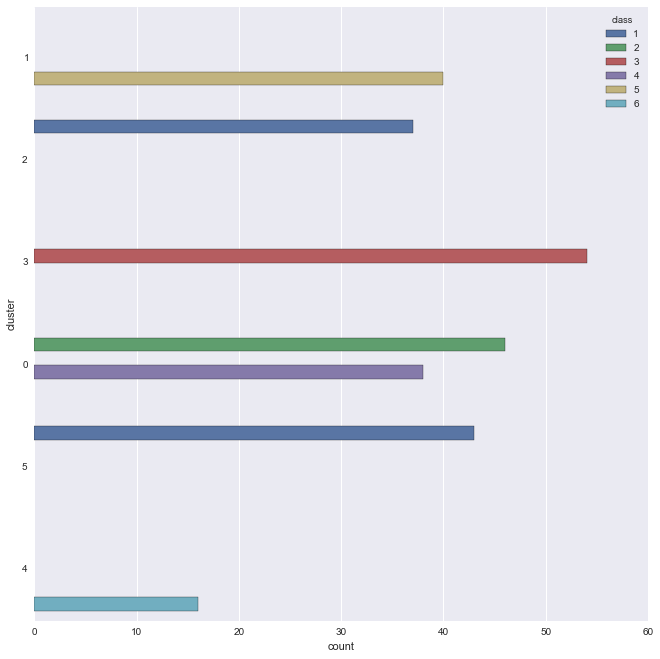

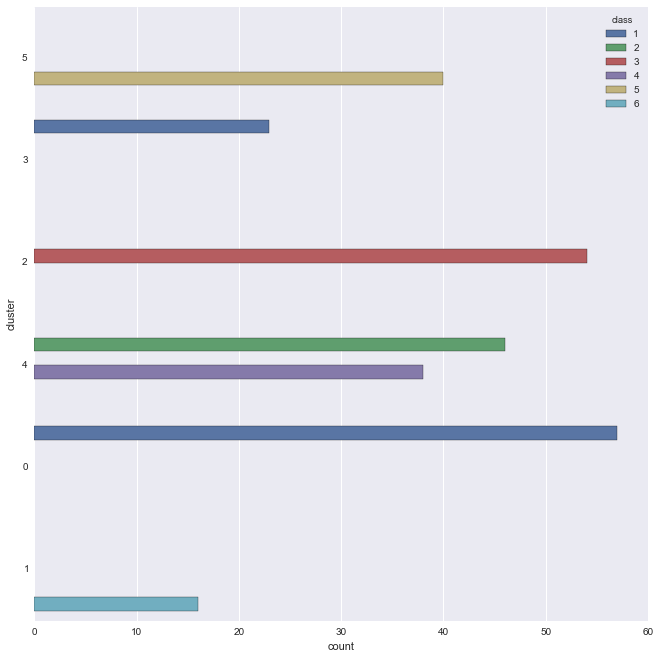

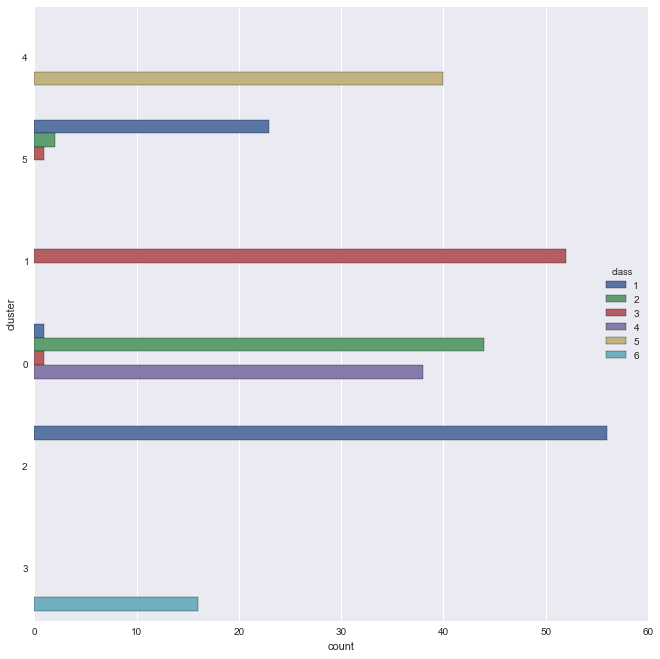

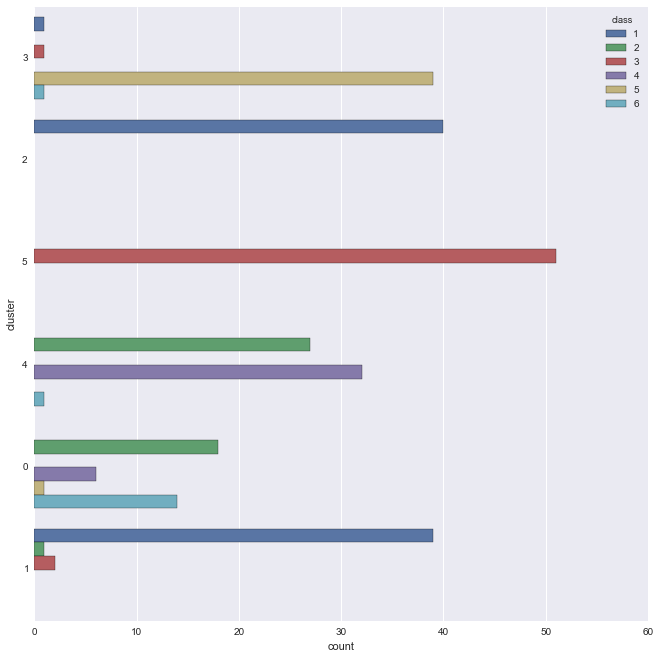

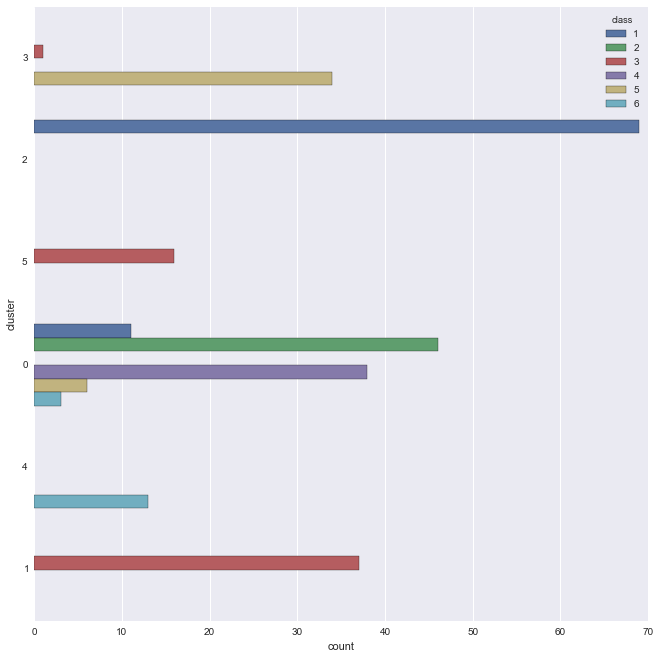

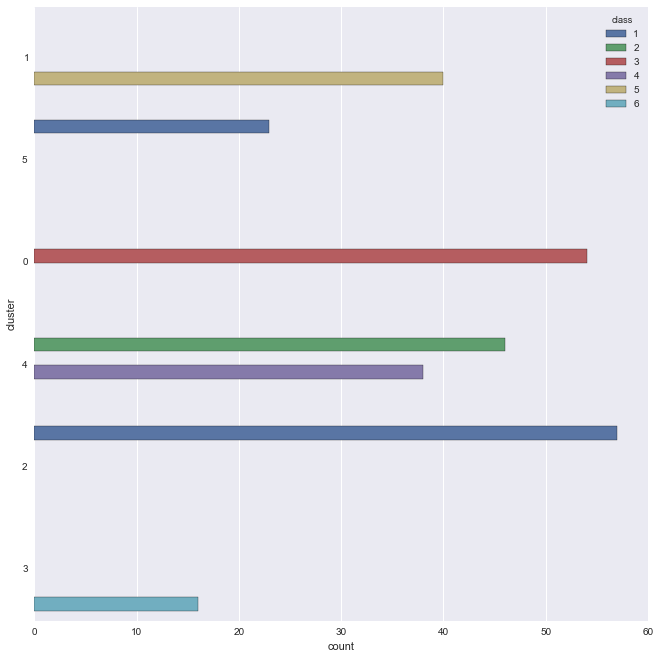

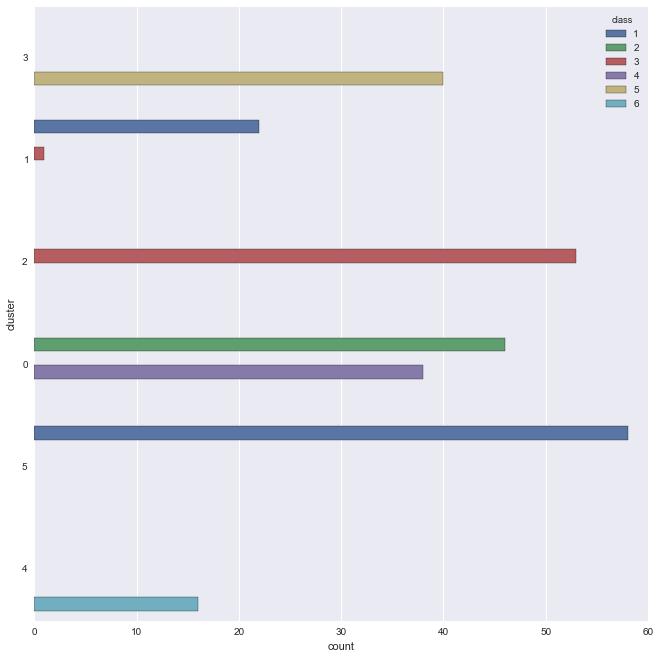

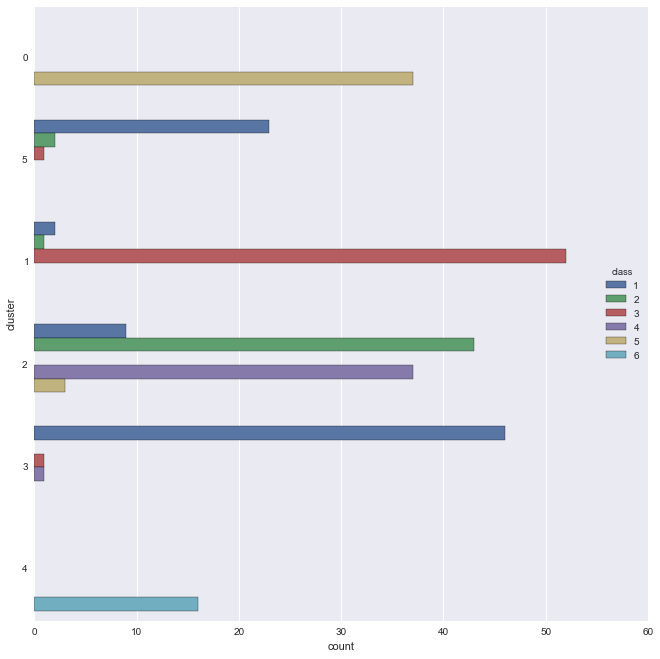

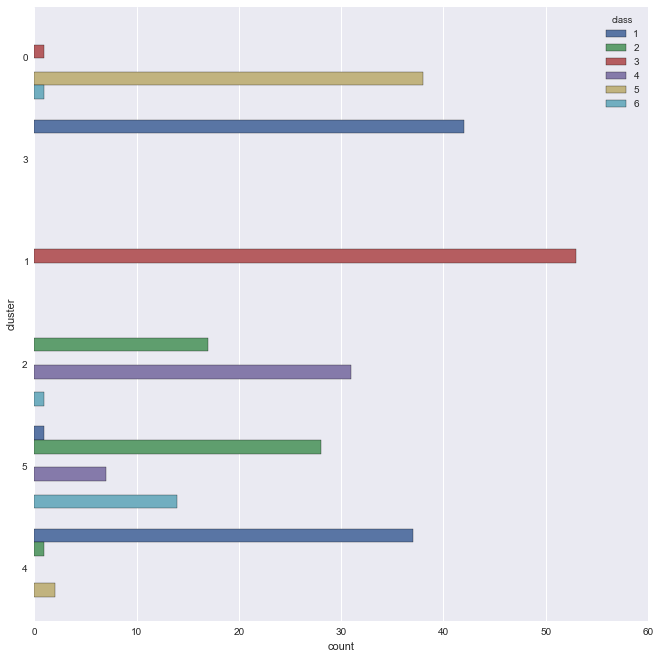

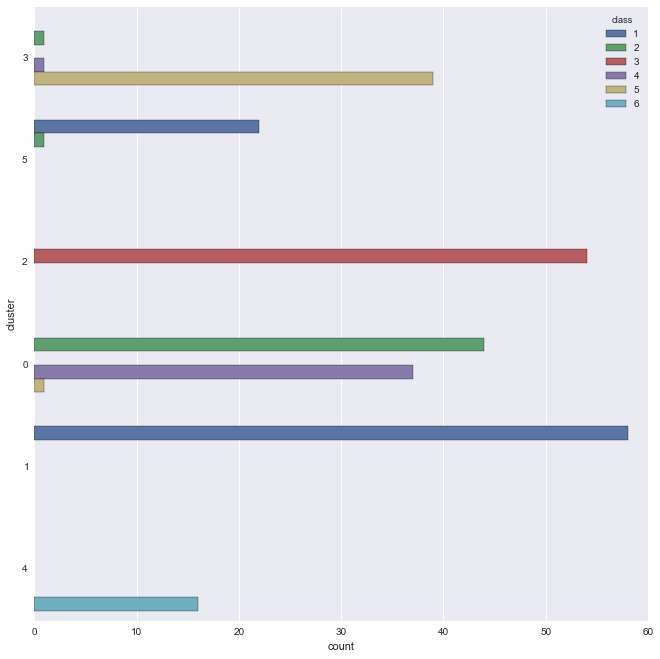

In [163]:
def make_cluster_plot( Y, cluster):
    fig = plt.figure(figsize=(11,11))
    df = pandas.DataFrame(np.stack((Y.T, cluster.T))).T
    df.columns = ['class','cluster']
    sb.countplot(y='cluster', data=df, hue='class', hue_order=range(1,7))
    return fig

def run_cluster_plot_ar(Y, cluster_ar, base_name='base'):
    for i, cluster in enumerate(cluster_ar):
        fig = make_cluster_plot(Y, cluster)
        fig.savefig(base_name + "_" +str(i) + '.png', dpi=300)



run_cluster_plot_ar( train_Y, 
                    [ kmeans['prediction'].T for kmeans in kmeans_ar ],
                   base_name='derm_kmeans')


run_cluster_plot_ar( train_Y, 
                    [ kmeans['prediction'].T for kmeans in maxlikelyhood_ar ],
                   base_name='derm_maxlike')